In [1]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from PIL import Image
from win32com import client
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import os

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2147352565), None)

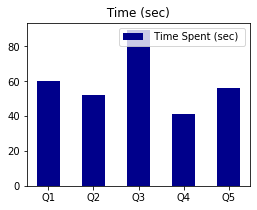

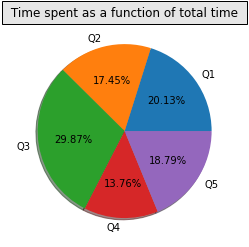

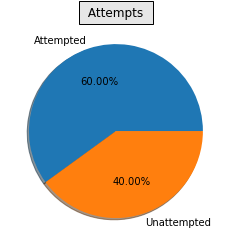

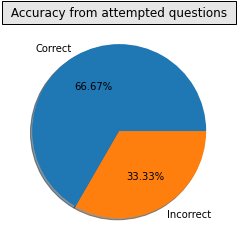

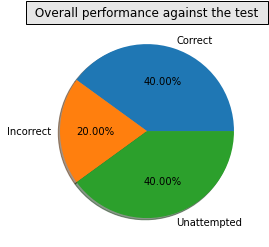

In [3]:
df=pd.read_excel('Assignment.xlsx',sheet_name='Raw data',header=3,index_col=None,usecols=range(1,21))
cwdx=os.getcwd()

roll_list=list(df['Student No '].unique())

for i in roll_list:

#     temp=pd.read_excel('Assignment.xlsx',sheet_name='Basic Scorecard Format ')


    x=df[df['Student No ']==i]

    all=x[x.columns[11:20]] 



    roll=list(df['Student No '].unique())
    sum_stu=[]
    for j in roll:
        to_sum=df[df['Student No ']==j]

        sum1=to_sum['Your score'].sum()
        sum_stu.append(sum1)
        
    
    
    wb2 = load_workbook('Assignment Temp.xlsx')
    temp1 = wb2["Basic Scorecard Format "]
    temp1['D8'].value=list(x['Name of Candidate'])[0]
    temp1['D9'].value=list(x['Grade '])[0]
    temp1['D10'].value=list(x['Name of school '])[0]
    temp1['D11'].value=list(x['City of Residence'])[0]
    temp1['D12'].value=list(x['Country of Residence'])[0]
    temp1['H8'].value=list(x['Registration'])[0]
    temp1['H9'].value=list(x['Gender'])[0]
    dob=str(list(x['Date of Birth '])[0])[:-9]
    temp1['H10'].value=dob
    dot=str(list(x['Date and time of test'])[0])[:-9]
    temp1['H11'].value=dot
    temp1['H12'].value=list(x['Extra time assistance'])[0]

    
    
    time=list(all.iloc[:,1])
    sic=list(all.iloc[:,2])
    sii=list(all.iloc[:,3])
    ast=list(all.iloc[:,4])
    wym=list(all.iloc[:,5])
    ans=list(all.iloc[:,6])
    out=list(all.iloc[:,7])
    score=list(all.iloc[:,8])

    str1=[time,sic,sii,ast,wym,ans,out,score]


    for k in range(2,10,1):

        nt=0
        for col in temp1.iter_cols(min_row=19, min_col=k,max_col=k, max_row=23):

            for cell in col:

                cell.value=str1[k-2][nt]
                nt=nt+1
                
              
    total_score=temp1['I19'].value+temp1['I20'].value+temp1['I21'].value+temp1['I22'].value+temp1['I23'].value

    count_low=0
    if total_score==0:
        low=0
    else:
        
        for p in sum_stu:
            if p < total_score:
                
                count_low=count_low+1
            
        
    low = count_low

    
    total_stu=len(roll)
    percentile=low*100/total_stu


    temp1['C26'].value=total_score
    temp1['D28'].value=percentile
    
    x = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
    tt1 = [temp1["B19"].value,temp1["B20"].value,temp1["B21"].value,temp1["B22"].value,temp1["B23"].value]

    
    
    plt.figure(figsize=(4,3))
    plt.bar(x,tt1,color='darkblue',width=0.50)
    plt.title(" Time (sec) ")
    plt.legend([" Time Spent (sec) "])

    plt.savefig('Temp\\bar.png')

    img = openpyxl.drawing.image.Image('Temp\\bar.png')
    img.anchor = 'B46'
    temp1.add_image(img)
    
    total=temp1["B19"].value+temp1["B20"].value+temp1["B21"].value+temp1["B22"].value+temp1["B23"].value
    
    plt.figure(figsize=(4,4))
    students = [temp1["B19"].value/total,temp1["B20"].value/total,temp1["B21"].value/total,temp1["B22"].value/total,temp1["B23"].value/total]
    plt.pie(students, labels = x,autopct='%1.2f%%',shadow=True)
    plt.title(" Time spent as a function of total time ",bbox={'facecolor':'0.9', 'pad':5})

    plt.savefig('Temp\\pie1.png')

    img = openpyxl.drawing.image.Image('Temp\\pie1.png')
    img.anchor = 'F46'
    temp1.add_image(img)
    
    ast1=ast.count('Attempted')
    ast2=ast.count('Unattempted')
    final=[ast1,ast2]
    x=['Attempted','Unattempted']
    plt.figure(figsize=(5,4))
    plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
    plt.title(" Attempts ",bbox={'facecolor':'0.9', 'pad':5})

    plt.savefig('Temp\\pie2.png')

    img = openpyxl.drawing.image.Image('Temp\\pie2.png')
    img.anchor = 'A60'
    temp1.add_image(img)
    
    corr=out.count('Correct')
    inc=out.count('Incorrect')

    final=[corr/ast1,inc/ast1]
    x=['Correct','Incorrect']


    plt.figure(figsize=(4,4))
    plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
    plt.title(" Accuracy from attempted questions ",bbox={'facecolor':'0.9', 'pad':5})

    plt.savefig('Temp\\pie3.png')

    img = openpyxl.drawing.image.Image('Temp\\pie3.png')
    img.anchor = 'F60'
    temp1.add_image(img)
    
    tot_att=len(out)

    final=[corr,inc,ast2]
    x=['Correct','Incorrect','Unattempted']

    plt.figure(figsize=(4,4))
    plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
    plt.title(" Overall performance against the test ",bbox={'facecolor':'0.9', 'pad':5})

    plt.savefig('Temp\\pie4.png')

    img = openpyxl.drawing.image.Image('Temp\\pie4.png')
    img.anchor = 'B75'
    temp1.add_image(img)
    
    size = 92, 99
    img_path='images/'+str(i)+'.jpg'
    im = Image.open(img_path)
    im_resized = im.resize(size, Image.ANTIALIAS)
    im_resized.save("images/my_image_resized.png", "PNG")
    img = openpyxl.drawing.image.Image('images/my_image_resized.png')
    img.anchor = 'H3'
    temp1.add_image(img)

    
    wb2.save("Temp/Excel/Temp_excel"+str(i)+".xlsx")
    
    xlApp = client.Dispatch("Excel.Application")
    books = xlApp.Workbooks.Open(cwdx+"\\Temp\\Excel\\Temp_excel"+str(i)+".xlsx")
    ws = books.Worksheets[0]
    ws.Visible = 1
    rpt_path=cwdx+'\Pdfs\\'+str(i)+'_report_card.pdf'
    ws.ExportAsFixedFormat(0,rpt_path )
    


In [30]:
import os

cwdx=os.getcwd()
print(x)
img_path=cwdx+'\Temp_excel.xlsx'
img_path

C:\Users\Shanu\Desktop\Wisdom Assignment


'C:\\Users\\Shanu\\Desktop\\Wisdom Assignment\\Temp_excel.xlsx'

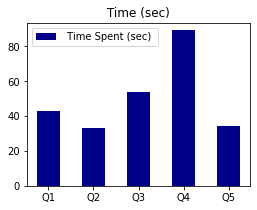

In [5]:
x = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
tt1 = [temp1["B19"].value,temp1["B20"].value,temp1["B21"].value,temp1["B22"].value,temp1["B23"].value]

import matplotlib

import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.bar(x,tt1,color='darkblue',width=0.50)
plt.title(" Time (sec) ")
plt.legend([" Time Spent (sec) "])

plt.savefig('Temp\\bar.png')

img = openpyxl.drawing.image.Image('Temp\\bar.png')
img.anchor = 'B46'
temp1.add_image(img)


253


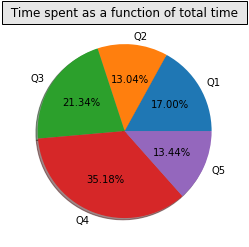

In [6]:
total=temp1["B19"].value+temp1["B20"].value+temp1["B21"].value+temp1["B22"].value+temp1["B23"].value
print(total)
plt.figure(figsize=(4,4))
students = [temp1["B19"].value/total,temp1["B20"].value/total,temp1["B21"].value/total,temp1["B22"].value/total,temp1["B23"].value/total]
plt.pie(students, labels = x,autopct='%1.2f%%',shadow=True)
plt.title(" Time spent as a function of total time ",bbox={'facecolor':'0.9', 'pad':5})

plt.savefig('Temp\\pie1.png')

img = openpyxl.drawing.image.Image('Temp\\pie1.png')
img.anchor = 'F46'
temp1.add_image(img)

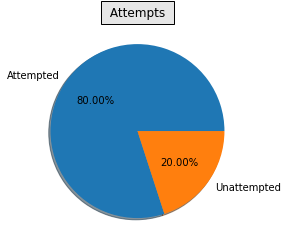

In [7]:
ast1=ast.count('Attempted')
ast2=ast.count('Unattempted')
final=[ast1,ast2]
x=['Attempted','Unattempted']
plt.figure(figsize=(5,4))
plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
plt.title(" Attempts ",bbox={'facecolor':'0.9', 'pad':5})

plt.savefig('Temp\\pie2.png')

img = openpyxl.drawing.image.Image('Temp\\pie2.png')
img.anchor = 'A60'
temp1.add_image(img)


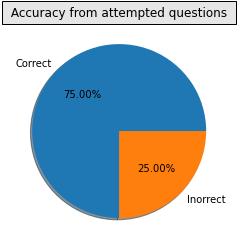

In [8]:
corr=out.count('Correct')
inc=out.count('Incorrect')

final=[corr/ast1,inc/ast1]
x=['Correct','Inorrect']


plt.figure(figsize=(4,4))
plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
plt.title(" Accuracy from attempted questions ",bbox={'facecolor':'0.9', 'pad':5})

plt.savefig('Temp\\pie3.png')

img = openpyxl.drawing.image.Image('Temp\\pie3.png')
img.anchor = 'F60'
temp1.add_image(img)


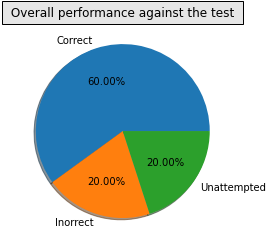

In [9]:
tot_att=len(out)

final=[corr,inc,ast2]
x=['Correct','Inorrect','Unattempted']

plt.figure(figsize=(4,4))
plt.pie(final, labels = x,autopct='%1.2f%%',shadow=True)
plt.title(" Overall performance against the test ",bbox={'facecolor':'0.9', 'pad':5})

plt.savefig('Temp\\pie4.png')

img = openpyxl.drawing.image.Image('Temp\\pie4.png')
img.anchor = 'B75'
temp1.add_image(img)

In [10]:
size = 92, 99
im = Image.open("images/2.jpg")
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("images/my_image_resized.png", "PNG")
img = openpyxl.drawing.image.Image('images/my_image_resized.png')
img.anchor = 'H3'
temp1.add_image(img)


wb2.save("samtemp11.xlsx")

In [11]:
xlApp = client.Dispatch("Excel.Application")
books = xlApp.Workbooks.Open('C:\\Users\\Shanu\\Desktop\\Wisdom Assignment\\samtemp11.xlsx')
ws = books.Worksheets[0]
ws.Visible = 1
ws.ExportAsFixedFormat(0, 'C:\\Users\\Shanu\\Desktop\\Wisdom Assignment\\sam1732.pdf')